P5. Solve eqs for $w = \delta p = \sigma = 0$...

In [2]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from camb import model, initialpower

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.6.1


P6. Matter Power Spectrum

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


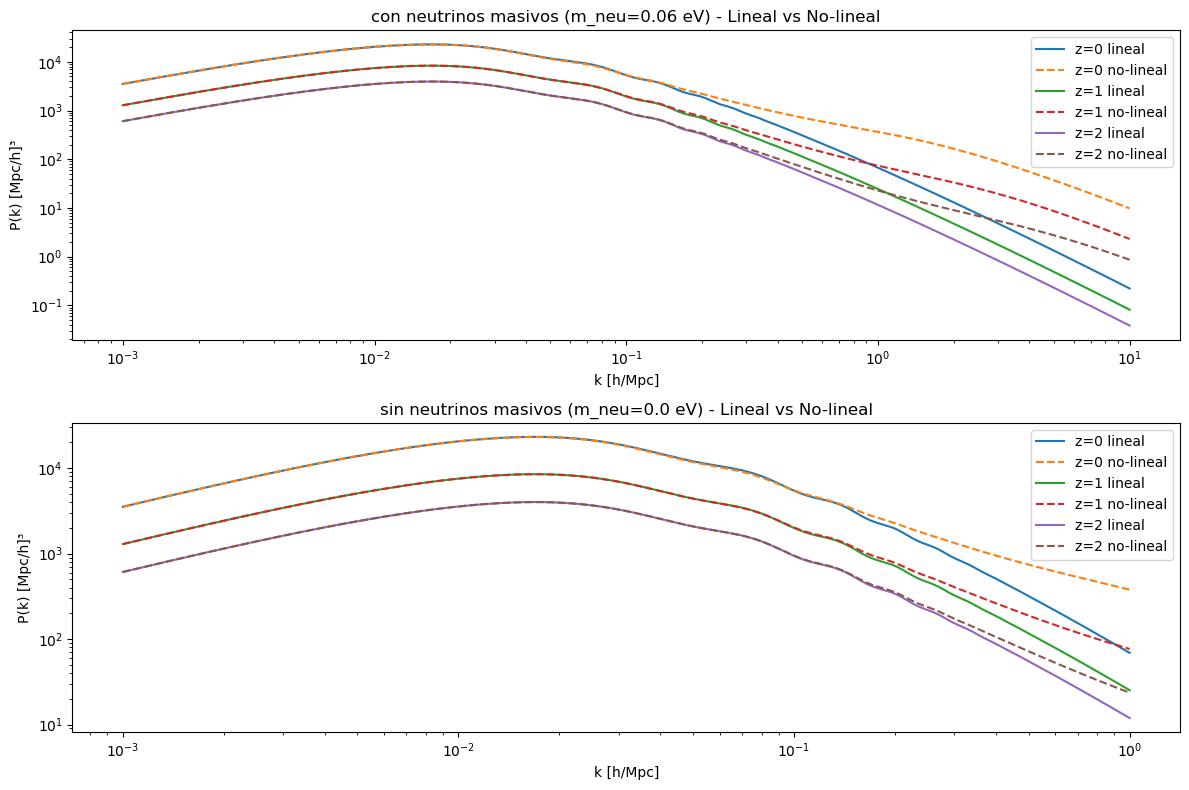

In [11]:
# Parámetros 
pars = camb.CAMBparams()
pars.set_cosmology(H0=67, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0)
pars.InitPower.set_params(ns=0.965)
z_vals = [0, 1, 2]

pars.set_matter_power(redshifts=z_vals, kmax=10.0)

# Caso lineal
results_linear = camb.get_results(pars)
k_linear, z_linear, pk_linear = results_linear.get_matter_power_spectrum(
    minkh=1e-3, maxkh=10, npoints=200)

# Caso con perturbaciones
pars.NonLinear = model.NonLinear_both
results_nonlinear = camb.get_results(pars)
k_nonlinear, z_nonlinear, pk_nonlinear = results_nonlinear.get_matter_power_spectrum(
    minkh=1e-3, maxkh=10, npoints=200)

# Ahora seteamos neutrinos masivos a cero
pars_no_neu = camb.CAMBparams()
pars_no_neu.set_cosmology(H0=67, ombh2=0.022, omch2=0.122, mnu=0.0, omk=0)
pars_no_neu.InitPower.set_params(ns=0.965)
pars_no_neu.set_matter_power(redshifts=z_vals, kmax=10.0)

# Caso lineal sin neutrinos
results_linear_no_neu = camb.get_results(pars_no_neu)
k_linear_nonu, z_linear_nonu, pk_linear_nonu = results_linear_no_neu.get_matter_power_spectrum(
    minkh=1e-3, maxkh=1, npoints=200)

# Caso no lineal sin neutrinos
pars_no_neu.NonLinear = model.NonLinear_both
results_nonlinear_nonu = camb.get_results(pars_no_neu)
k_nonlinear_nonu, z_nonlinear_nonu, pk_nonlinear_nonu = results_nonlinear_nonu.get_matter_power_spectrum(
    minkh=1e-3, maxkh=1, npoints=200)

# Graficar con y sin neutrinos masivos
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
for i, redshift in enumerate(z_vals):
    plt.loglog(k_linear, pk_linear[i], label=f'z={redshift} lineal', ls='-')
    plt.loglog(k_nonlinear, pk_nonlinear[i], label=f'z={redshift} no-lineal', ls='--')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [Mpc/h]³')
plt.title('con neutrinos masivos (m_neu=0.06 eV) - lineal vs no lineal')
plt.legend()

plt.subplot(2, 1, 2)
for i, redshift in enumerate(z_vals):
    plt.loglog(k_linear_nonu, pk_linear_nonu[i], label=f'z={redshift} lineal', ls='-')
    plt.loglog(k_nonlinear_nonu, pk_nonlinear_nonu[i], label=f'z={redshift} no lineal', ls='--')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [Mpc/h]³')
plt.title('sin neutrinos masivos (m_neu=0.0 eV) - lineal vs no lineal')
plt.legend()

plt.tight_layout()
plt.show()

